In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import sqrt

plt.rcParams["figure.dpi"] = 100
plt.rcParams["figure.figsize"] = (20, 28)
# plt.style.use('dark_background')


### Ładowanie danych

In [40]:
df = pd.read_csv("data.csv")
df.head(10)


,Lp,H,t1,t2,t3,t4,t5
0,1,0.5,0.319,0.319,0.319,0.319,0.319
1,2,0.6,0.348,0.348,0.349,0.349,0.348
2,3,0.7,0.376,0.376,0.376,0.376,0.377
3,4,0.8,0.404,0.403,0.403,0.403,0.403
4,5,0.9,0.428,0.428,0.429,0.428,0.429
5,6,1.0,0.452,0.452,0.453,0.452,0.452
6,7,1.1,0.472,0.474,0.473,0.473,0.473
7,8,1.2,0.495,0.494,0.495,0.494,0.493
8,9,1.3,0.515,0.516,0.516,0.516,0.516
9,10,1.4,0.534,0.534,0.534,0.534,0.535


### Obliczenie średniego czasu spadania $t_{śr}$

In [41]:
df["t_śr"] = df.iloc[:, 2:6].mean(axis=1)
df["sqrt(H)"] = np.sqrt(df.iloc[:, 1])
df["t_śr"]


0    0.31900
1    0.34850
2    0.37600
3    0.40325
4    0.42825
5    0.45225
6    0.47300
7    0.49450
8    0.51575
9    0.53400
Name: t_śr, dtype: float64

### Obliczenie niepewności typu $a$ średnich czasów spadania

In [42]:
# t[numer_testu][0..9]
t = [
    [df["t1"][i], df["t2"][i], df["t3"][i], df["t4"][i], df["t5"][i]] for i in range(10)
]

t_sr = df["t_śr"].tolist()
print(t)

def get_at_error() -> "list[float]":
    """
    "   Oblicza błędy u_a(t_sr) dla każdego t_sr
    """

    fischer_const = 1.141
    n = 5  # liczba pomiarów w serii
    return [
        sqrt(1 / (n * (n - 1)) * (sum([(x - xsr) ** 2 for x in xlist]))) * fischer_const
        for xsr, xlist in zip(t_sr, t)
    ]


u_at = get_at_error()
#print(u_at)


[[0.319, 0.319, 0.319, 0.319, 0.319], [0.348, 0.348, 0.349, 0.349, 0.348], [0.376, 0.376, 0.376, 0.376, 0.377], [0.404, 0.403, 0.403, 0.403, 0.403], [0.428, 0.428, 0.429, 0.428, 0.429], [0.452, 0.452, 0.453, 0.452, 0.452], [0.472, 0.474, 0.473, 0.473, 0.473], [0.495, 0.494, 0.495, 0.494, 0.493], [0.515, 0.516, 0.516, 0.516, 0.516], [0.534, 0.534, 0.534, 0.534, 0.535]]


### Obliczenie niepewności typu $b$ średnich czasów spadania

In [43]:
def get_bt_error() -> float:
    """
    "   Oblicza błąd u_b(t) dla t
    """

    return 0.003 / sqrt(3)


u_bt = get_bt_error()
print(u_bt)


0.0017320508075688774


### Obliczenie niepewności całkowitych średnich czasów spadania

In [44]:
def get_ut_error() -> "list[float]":
    """
    "   Oblicza całkowite błędy u(t_sr) dla każdego t_sr
    """

    b = u_bt
    return [sqrt(a * a + b * b) for a in u_at]


ut = get_ut_error()
print(ut)
for u in ut:
    print(round(u,4))


[0.0017320508075688774, 0.0017553824547659124, 0.0017507410002624605, 0.0017472518180345383, 0.0017565409020643395, 0.0017472518180345383, 0.0017692337606998122, 0.0017920813771980335, 0.0017472518180345383, 0.0017507410002624605]
0.0017
0.0018
0.0018
0.0017
0.0018
0.0017
0.0018
0.0018
0.0017
0.0018


### Obliczenie niepewności $\sqrt{H}$

In [45]:
u_H = 0.003  # [m]


def get_sqrtH_error(H):
    return [u_H / (2 * sqrt(h)) for h in H]

u_sqrtH = get_sqrtH_error(df["H"])
for u in u_sqrtH:
    print(round(u,4))


0.0021
0.0019
0.0018
0.0017
0.0016
0.0015
0.0014
0.0014
0.0013
0.0013


### Wykres zależności $t_{śr}$ od $H$

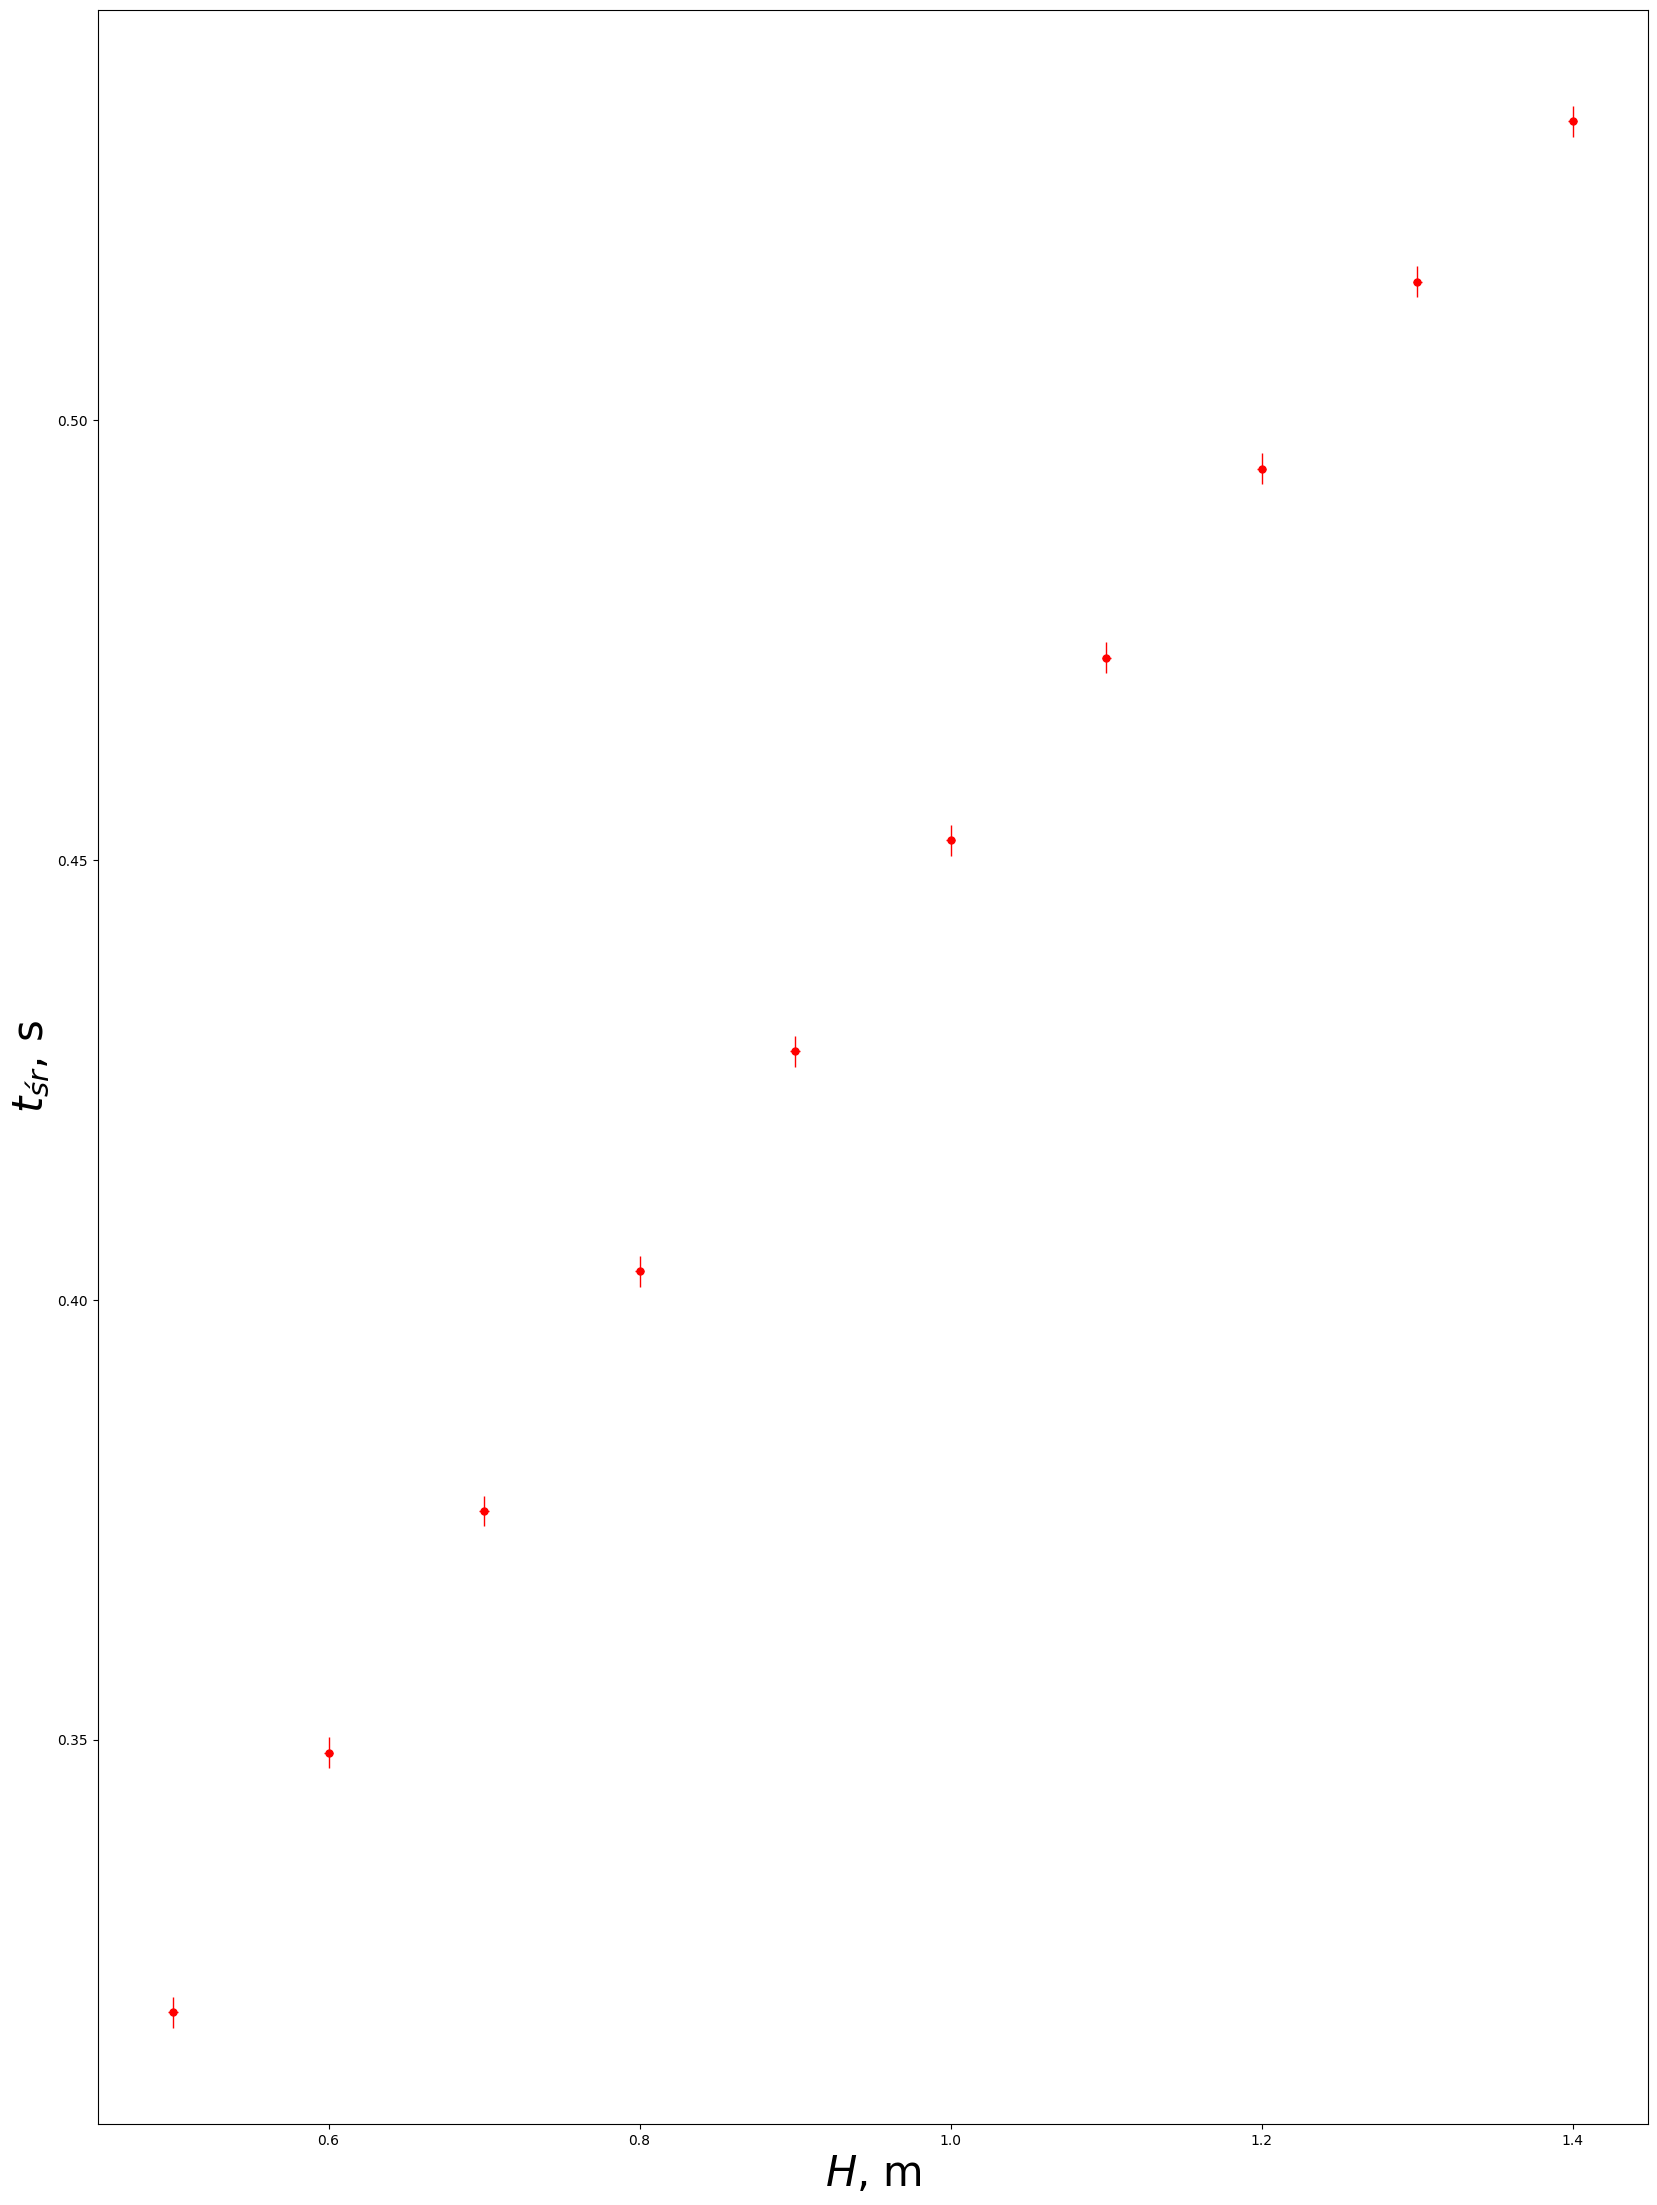

In [46]:
plt.errorbar(
    df["H"],
    df["t_śr"],
    xerr=u_H,
    yerr=ut,
    fmt="o",
    label="xd",
    linewidth=1,
    markersize=5,
    color="red",
)

plt.ylabel("$t_{śr}$, s", fontsize=30)
plt.xlabel("$H$, m", fontsize=30)

plt.savefig("wykres1.jpg")


### Wykres zależności $t_{śr}$ od $\sqrt{H}$

a=0.45435474037398577, u(a)=0.0014888179913340185
b=-0.003053600453959002, u(b)=0.0014511202778384252


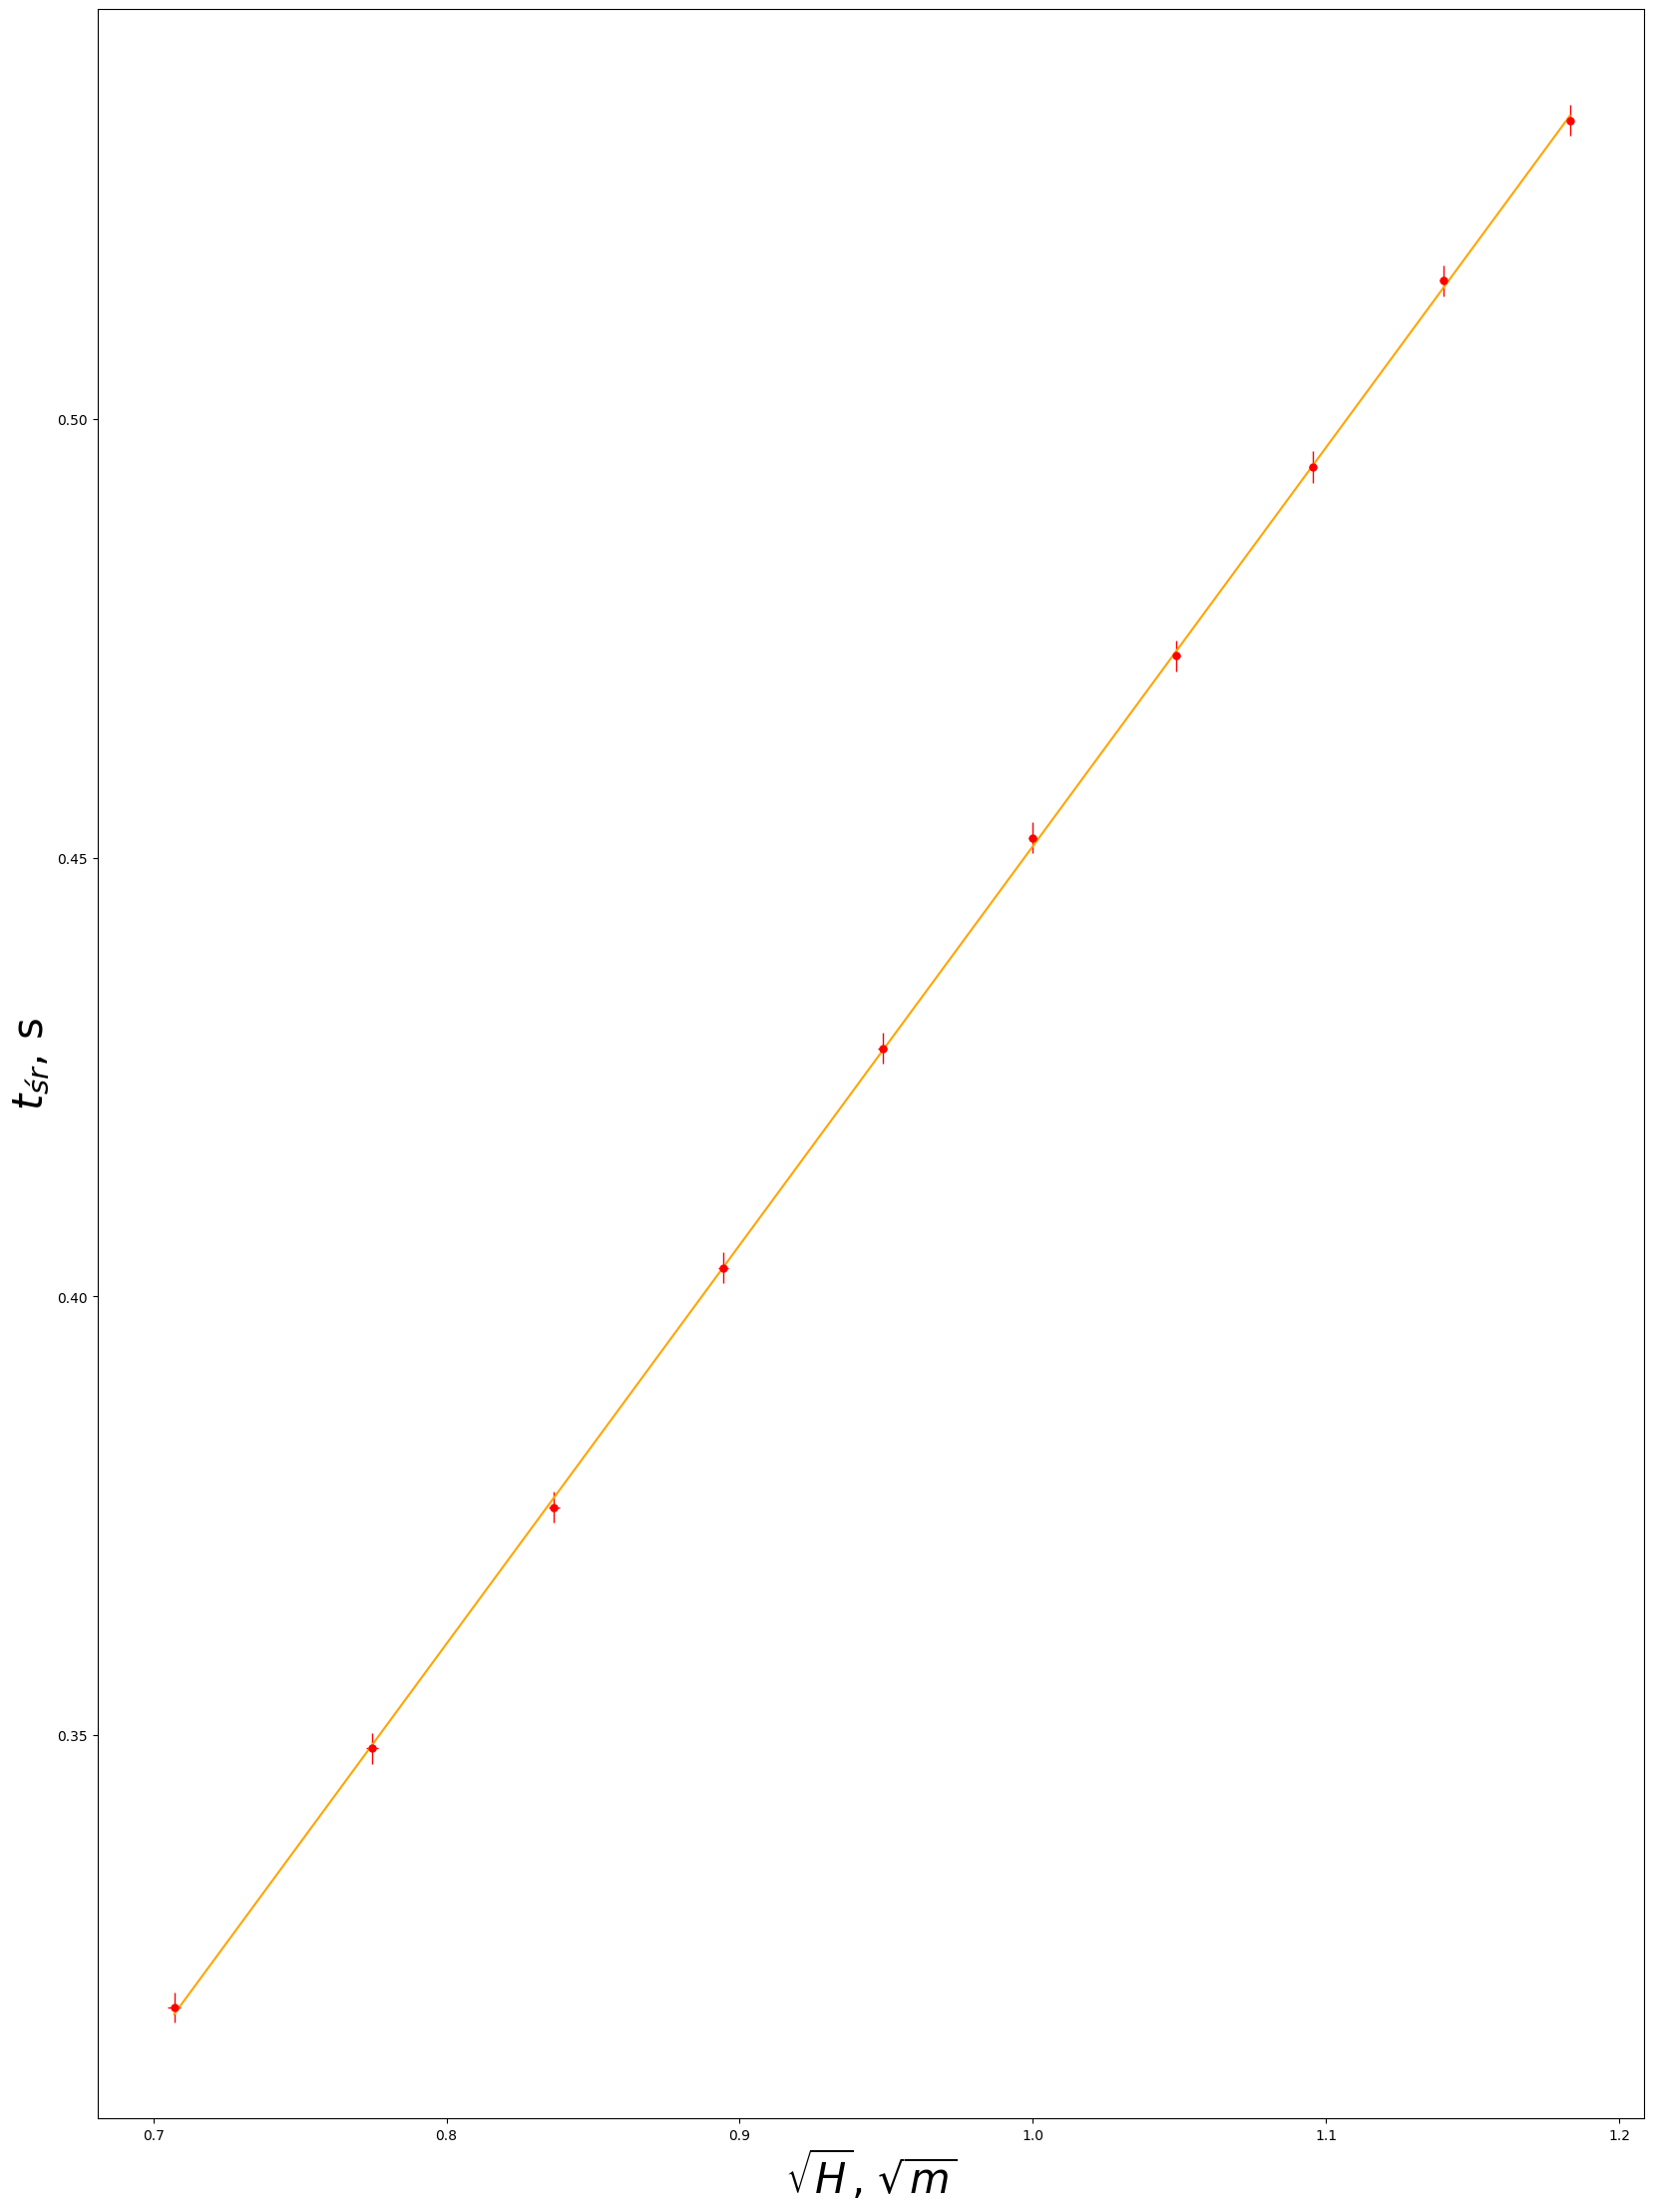

In [47]:
plt.errorbar(
    df["sqrt(H)"],
    df["t_śr"],
    xerr=u_sqrtH,
    yerr=ut,
    fmt="o",
    label="xd",
    linewidth=1,
    markersize=5,
    color="red",
)

sqrt_h = df["sqrt(H)"]
a, b = np.polyfit(sqrt_h, t_sr, 1)
plt.plot(sqrt_h, a * sqrt_h + b, color="orange")


def get_a_error() -> float:
    """
    "   Zwraca niepewność współczynnika kierukowego a
    """

    n = 10
    S_x = sum(sqrt_h)
    S_xx = sum([x * x for x in sqrt_h])
    S_ee = sum([(y - a * x - b) ** 2 for x, y in zip(sqrt_h, t_sr)])
    return sqrt(n / (n - 2) * S_ee / (n * S_xx - S_x * S_x))


def get_b_error() -> float:
    """
    "    Zwraca niepewność wyrazu wolnego b
    """

    n = 10
    S_x = sum(sqrt_h)
    S_xx = sum([x * x for x in sqrt_h])
    S_ee = sum([(y - a * x - b) ** 2 for x, y in zip(sqrt_h, t_sr)])
    return sqrt(1 / (n - 2) * (S_xx * S_ee) / (n * S_xx - S_x * S_x))


a_error = get_a_error()
b_error = get_b_error()

print(f"a={a}, u(a)={a_error}")
print(f"b={b}, u(b)={b_error}")

plt.ylabel("$t_{śr}$, s", fontsize=30)
plt.xlabel("$\sqrt{H}$, $\sqrt{m}$", fontsize=30)

plt.savefig("wykres2.jpg")


### Wyznaczenie $g$.

In [52]:
a = 0.45
print(round(2 / (a * a), 2))


9.88


### Policzenie g dla Gliwic

In [49]:
from math import sin, radians


def calc_g(phi, h):
    return (
        9.780318 * (1 + 0.0053024 * (sin(phi) ** 2) - 0.0000058 * (sin(2 * phi) ** 2))
        - 3.086 * 10e-6 * h
    )


phi = 50.3
h = 219
print(calc_g(radians(phi), h))


9.80420421382484
